# Zadanie 3 - drzewa decyzyjne

In [42]:
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np

In [43]:
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [44]:
clf.predict(iris.data[:1, :])

array([0])

In [45]:
clf.predict_proba(iris.data[:1, :])

array([[1., 0., 0.]])

In [46]:
from sklearn.externals.six import StringIO  
import pydot 

In [47]:
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("iris.pdf")

# Zadanie - klasyfikacja cyfr

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

In [49]:
 # wczytywanie danych
dane = loadmat('baza_mnist.mat.pdf')

In [50]:
#Zad 1. Podziel dane na parametry X oraz odpowiedź y:
X = dane['X']
y = dane['y']

In [51]:
# Standaryzacja
for i in range(X.shape[0]):
    X[i, :] = X[i, :] / np.std(X[i, :])

In [52]:
# Zamiana cyfry 10 -> 0 (błąd w zbiorze danych)    
y[np.where(y==10)]=0

In [53]:
# wysokość i szerokość obrazka z cyfrą 
h = 20
w = 20

In [54]:
# Zad 2. Proszę wyświetlić liczbę cyfr oraz liczbę pikseli przypadającą na jeden obraz
print('Number of digits: {}'.format(np.bincount(y[:, 0]).shape[0]))
print('Amount of pixels per one image: {}'.format(X.shape[1]))

Number of digits: 10
Amount of pixels per one image: 400


In [55]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i, :].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(str(titles[i]), size=12)
        plt.xticks(())
        plt.yticks(())

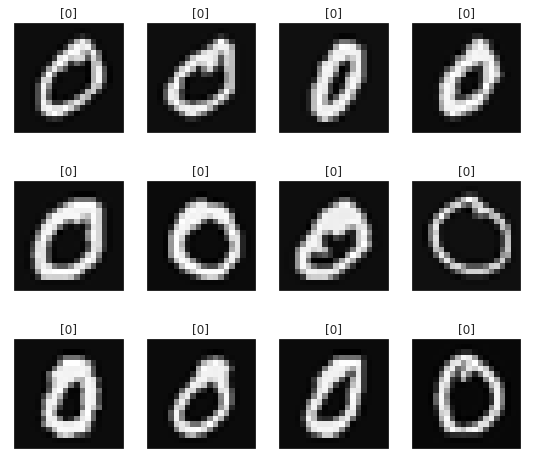

In [56]:
# Zad 3
plot_mnist(X, y, h, w)

In [57]:
# Zad. 4
# Split data on training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [58]:
# Zad. 5
# Create classifier
DEPTH = 10
tree_classifier = tree.DecisionTreeClassifier(max_depth=DEPTH)

# Learning
tree_classifier.fit(X=X_train, y=y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
# Save tree structure to pdf
dot_data = StringIO() 
tree.export_graphviz(tree_classifier, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("mnist.pdf")

In [60]:
# Prediction
predictions = tree_classifier.predict(X=X_test)

In [61]:
# Accuracy
accuracy_score(y_true=y_test, y_pred=predictions)

0.7806666666666666

In [62]:
# Classification report
print(classification_report(y_true=y_test, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       153
           1       0.86      0.92      0.89       145
           2       0.76      0.61      0.68       152
           3       0.78      0.71      0.75       150
           4       0.83      0.78      0.80       145
           5       0.74      0.68      0.71       147
           6       0.81      0.81      0.81       149
           7       0.88      0.80      0.84       154
           8       0.69      0.73      0.71       153
           9       0.63      0.84      0.72       152

   micro avg       0.78      0.78      0.78      1500
   macro avg       0.79      0.78      0.78      1500
weighted avg       0.79      0.78      0.78      1500



In [63]:
# F1 score
f1_scores_per_class = f1_score(y_true=y_test, y_pred=predictions, average=None)
for i, score in enumerate(f1_scores_per_class):
    print('F1 score for {} is {}'.format(i, score))

F1 score for 0 is 0.89171974522293
F1 score for 1 is 0.8903654485049833
F1 score for 2 is 0.6788321167883211
F1 score for 3 is 0.7456445993031359
F1 score for 4 is 0.8042704626334519
F1 score for 5 is 0.7092198581560283
F1 score for 6 is 0.8120805369127517
F1 score for 7 is 0.8395904436860068
F1 score for 8 is 0.711111111111111
F1 score for 9 is 0.7211267605633802


In [64]:
# Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=predictions)

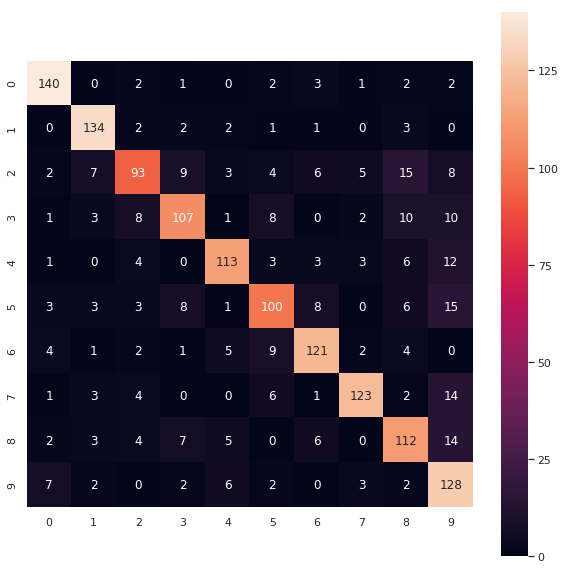

In [65]:
# Pretty print confusion matrix using seaborn package
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 10)})
sns.heatmap(data=cm, annot=True, fmt='g', square=True)